In [1]:
# Data loading

from sklearn.datasets import load_wine

dataset = load_wine()
data = dataset.data
labels = dataset.target

print(data)
print(labels)
print(data.shape)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
(178, 13)


In [2]:
# Split data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3) 
print(len(x_train), len(x_test), type(x_train))

print(x_test)
print(y_test)

124 54 <class 'numpy.ndarray'>
[[1.225e+01 4.720e+00 2.540e+00 2.100e+01 8.900e+01 1.380e+00 4.700e-01
  5.300e-01 8.000e-01 3.850e+00 7.500e-01 1.270e+00 7.200e+02]
 [1.438e+01 1.870e+00 2.380e+00 1.200e+01 1.020e+02 3.300e+00 3.640e+00
  2.900e-01 2.960e+00 7.500e+00 1.200e+00 3.000e+00 1.547e+03]
 [1.162e+01 1.990e+00 2.280e+00 1.800e+01 9.800e+01 3.020e+00 2.260e+00
  1.700e-01 1.350e+00 3.250e+00 1.160e+00 2.960e+00 3.450e+02]
 [1.225e+01 1.730e+00 2.120e+00 1.900e+01 8.000e+01 1.650e+00 2.030e+00
  3.700e-01 1.630e+00 3.400e+00 1.000e+00 3.170e+00 5.100e+02]
 [1.217e+01 1.450e+00 2.530e+00 1.900e+01 1.040e+02 1.890e+00 1.750e+00
  4.500e-01 1.030e+00 2.950e+00 1.450e+00 2.230e+00 3.550e+02]
 [1.388e+01 1.890e+00 2.590e+00 1.500e+01 1.010e+02 3.250e+00 3.560e+00
  1.700e-01 1.700e+00 5.430e+00 8.800e-01 3.560e+00 1.095e+03]
 [1.207e+01 2.160e+00 2.170e+00 2.100e+01 8.500e+01 2.600e+00 2.650e+00
  3.700e-01 1.350e+00 2.760e+00 8.600e-01 3.280e+00 3.780e+02]
 [1.305e+01 2.050e+00 3.

In [3]:
# Convert to tensor

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset


x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).long()

x_test = torch.from_numpy(x_test).float()
y_test = torch.from_numpy(y_test).long()
print(type(x_train))

<class 'torch.Tensor'>


In [4]:
# Generating dataset

train_set = TensorDataset(x_train, y_train)
test_set = TensorDataset(x_test, y_test)



"""
문제 1 : train_loader 생성 ( 1점 )

조건 1 : train_set 변수 활용
조건 2 : 배치 크기는 16
조건 3 : shuffle 사용
"""
train_loader = DataLoader(dataset=train_set,
                          batch_size=16,
                          shuffle=True)


In [5]:
# Construct model

class Model(nn.Module):
  def __init__(self):
    super().__init__()

    
#문제 2 :  간단한 Linear 모델 구성 ( 2점 )

#조건 1 : 총 Layer 수는 6개이며, 입력부터 Feature 사이즈 진행은 다음과 같다.
#        ( 입력 -> 256 -> 128 -> 64 -> 32 -> 16 -> 3)
#조건 2 : Layer1,2,3 직후에는 Batch Normalization 층이 존재한다.
#조건 3 : 활성함수는 ReLU를 사용한다.

    ### 코드 작성 위치
    Layer1 = nn.Linear(13, 256)
    Layer2 = nn.Linear(256, 128)
    Layer3 = nn.Linear(128, 64)
    Layer4 = nn.Linear(64, 32)
    Layer5 = nn.Linear(32, 16)
    Layer6 = nn.Linear(16, 3)

    bn1 = nn.BatchNorm1d(256)
    bn2 = nn.BatchNorm1d(128)
    bn3 = nn.BatchNorm1d(64)

    relu = nn.ReLU()


    self.layers = nn.Sequential(
        nn.Flatten(),
        Layer1, bn1, relu, Layer2, bn2, relu, Layer3, bn3, relu,
        Layer4, relu, Layer5, relu, Layer6)  

  def forward(self,x):
    """
    문제 3 : Linear 모델 forward 함수 작성 ( 1점 )

    조건: 기본 순서는 다음과 같다.
    ( Linear 층 - Batch Normalization - Activation )
    """
    ### 코드 작성 위치
    return self.layers(x)

model = Model()
print(model)


Model(
  (layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=13, out_features=256, bias=True)
    (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Linear(in_features=128, out_features=64, bias=True)
    (8): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Linear(in_features=64, out_features=32, bias=True)
    (11): ReLU()
    (12): Linear(in_features=32, out_features=16, bias=True)
    (13): ReLU()
    (14): Linear(in_features=16, out_features=3, bias=True)
  )
)


In [6]:
# Configure optimizer

"""
문제 4 : Optimizer 생성 (1점)

조건 1 : SGD 생성
조건 2 : 학습률 0.001
조건 3 : Momentum 0.9
"""
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

"""
문제 5 : 손실 함수 생성 (1점 )

조건 1 : Cross Entropy Loss 생성
"""
criterion = nn.CrossEntropyLoss()

In [7]:
# Training

epochs = 200
losses = list()
accuracies = list()

for epoch in range(epochs):
  epoch_loss = 0  
  epoch_accuracy = 0


  for x, y in enumerate(train_loader, 0):

    """
    문제 6 : Training code 작성 ( 1점 )

    조건 1 : 튜토리얼에서 학습했던 내용과 같이 학습 코드 작성

    """
    ### 코드 작성 위치
    inputs, labels = y

    optimizer.zero_grad()

    output = model(inputs)
    loss = criterion(output, labels)
    loss.backward()
    
    optimizer.step()

    _, predicted = torch.max(output, dim=1)
    accuracy = (predicted == labels).sum().item()
    epoch_loss += loss.item()
    epoch_accuracy += accuracy
  

  epoch_loss /= len(train_loader)
  epoch_accuracy /= len(x_train)
  print("epoch :{}, \tloss :{}, \taccuracy :{}".format(str(epoch+1).zfill(3),round(epoch_loss,4), round(epoch_accuracy,4)))
  
  losses.append(epoch_loss)
  accuracies.append(epoch_accuracy)

  

epoch :001, 	loss :1.1147, 	accuracy :0.3306
epoch :002, 	loss :1.0987, 	accuracy :0.3306
epoch :003, 	loss :1.08, 	accuracy :0.3306
epoch :004, 	loss :1.061, 	accuracy :0.3306
epoch :005, 	loss :1.0492, 	accuracy :0.3306
epoch :006, 	loss :1.0362, 	accuracy :0.3306
epoch :007, 	loss :1.0149, 	accuracy :0.3306
epoch :008, 	loss :1.0087, 	accuracy :0.3306
epoch :009, 	loss :0.9894, 	accuracy :0.3306
epoch :010, 	loss :0.9684, 	accuracy :0.3306
epoch :011, 	loss :0.9503, 	accuracy :0.3306
epoch :012, 	loss :0.9481, 	accuracy :0.3387
epoch :013, 	loss :0.9082, 	accuracy :0.4113
epoch :014, 	loss :0.9048, 	accuracy :0.4839
epoch :015, 	loss :0.8909, 	accuracy :0.5887
epoch :016, 	loss :0.862, 	accuracy :0.6452
epoch :017, 	loss :0.8503, 	accuracy :0.7016
epoch :018, 	loss :0.8446, 	accuracy :0.8145
epoch :019, 	loss :0.8357, 	accuracy :0.75
epoch :020, 	loss :0.8048, 	accuracy :0.8065
epoch :021, 	loss :0.8029, 	accuracy :0.7581
epoch :022, 	loss :0.7958, 	accuracy :0.7984
epoch :023, 	los

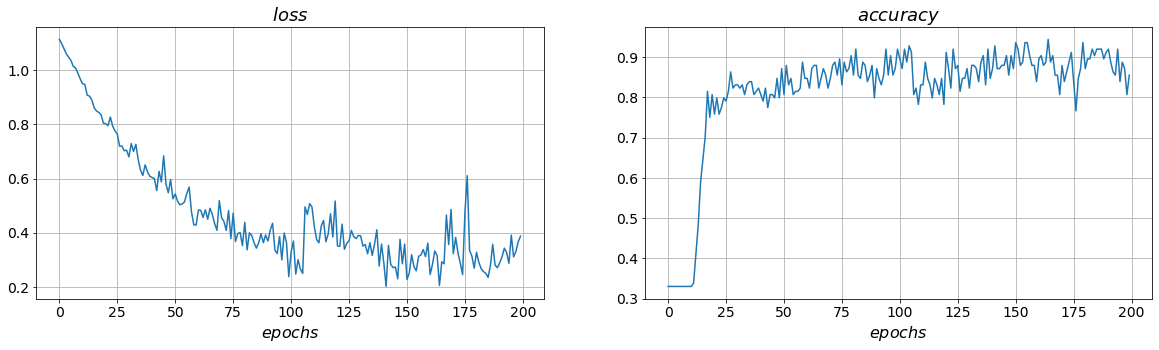

In [8]:
# Plot result

import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.subplots_adjust(wspace=0.2)

plt.subplot(1,2,1)
plt.title("$loss$",fontsize = 18)
plt.plot(losses)
plt.grid()
plt.xlabel("$epochs$", fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)


plt.subplot(1,2,2)
plt.title("$accuracy$", fontsize = 18)
plt.plot(accuracies)
plt.grid()
plt.xlabel("$epochs$", fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

In [9]:
# Test

output = model(x_test)
_, predicted = torch.max(output, dim=1)
accuracy = round((predicted == y_test).sum().item() / len(y_test),4)


print("test_set accuracy :", round(accuracy,4))

test_set accuracy : 0.8704
